# Lineaire regressie - opdrachten

In dit notebook vind je 2 opdrachten over lineaire regressie. 

- <a href = "#linreg_opdracht1"> Opdracht 1 </a> bestaat uit 2 oefeningen die je maakt ter voorbereiding van het college.
- <a href = "#linreg_opdracht2"> Opdracht 2 </a> bestaat uit 6 stappen en die maak je tijdens het college.

<a id="linreg_opdracht1"></a>
## Opdracht 1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
from sklearn import linear_model

In [2]:
personen = pd.DataFrame({'lengte': [1.678, 1.755, 1.764, 1.821, 1.809, 1.851, 1.848, 1.902], 
                         'gewicht': [62.2, 67.2, 72.7, 76.4, 75.2, 81.3, 87.4, 90.4]})

In [3]:
r = personen['gewicht'].corr(personen['lengte'])
print(f'Pearsons correlatiecoëfficient r = {r}')

Pearsons correlatiecoëfficient r = 0.9573607425326734


### Lineaire formule

Zoek de _beste_ lineaire formule die het gewicht $y$ voorspelt gegeven lengte $x$ met richtingscoëfficient $a$ en intercept $b$. Je vindt de beste formule door de _sum of squared residuals_ (SSR, de som van het kwadraat van de residuen) te minimaliseren. Maak hiervoor gebruik van de grafiek die hieronder getekend wordt. De verticale rode lijnen representeren het residu bij elke meetwaarde.

In [4]:
# x-as loopt van minimum van lengte tot maximum van lengte
x = np.linspace((personen[['lengte']].min()-.03), personen[['lengte']].max()+.03)

Bij _simple linear regression_ geldt: 

$$ a = \frac{ \sum_{i=1}^{n} (x_{i}-\bar{x})(y_{i}-\bar{y}) }{ \sum_{i=1}^{n}(x_{i}-\bar{x})^{2}} 
     = \frac{Cov[x,y]}{Var[x]} $$

en 

$$ b = \bar{y} - a \bar{x} $$

In [5]:
cov_xy = np.cov(personen['lengte'], personen['gewicht'], bias=True)[0][1]
var_x = np.var(personen['lengte'])
mean_x = personen['lengte'].mean()
mean_y = personen['gewicht'].mean()

a = cov_xy / var_x
b = mean_y - a * mean_x
y = a*x+b

print(f'y = {a} x + {b}')

y = 131.6842477458896 x + -160.8925408097119


In [6]:
a = ((personen['lengte'] - mean_x) * (personen['gewicht'] - mean_y)).sum() / ((personen['lengte'] - mean_x)**2).sum()
b = mean_y - a * mean_x

y = a*x+b

print(f'y = {a} x + {b}')

y = 131.6842477458896 x + -160.8925408097119


In [7]:
reg = linear_model.LinearRegression()
reg.fit(personen[['lengte']], personen[['gewicht']])
print(f'y = {reg.coef_[0][0]} x + {reg.intercept_[0]}')
personen['gewicht_linreg'] = reg.predict(personen[['lengte']])

a, b = reg.coef_[0][0], reg.intercept_[0]
y = a*x+b
# geeft ssr = 53.59

y = 131.68424774588954 x + -160.8925408097118


### Opdracht 1a: bepaal handmatig de beste coëfficienten
Pas a en b zodanig aan dat je de 'Sum of squared residuals (SSR)' minimaliseert
Pas in deze cel a en b aan, run deze cel en de volgende cel en analyseer het resultaat aan de hand van de score die 
boven in de visualisatie getoond wordt

 - Tip 1: je kunt als eerste gok de coëfficienten uitrekenen op basis van een van de gegeven punten
 - Tip 2: je kunt de helling van de lijn aanpassen met a
 - Tip 3: je kunt de hoogte van de lijn aanpassen met b

### Opdracht 1b: bepaal de beste coëfficienten met behulp van Lineaire Regressie
We gaan nu de computer coëfficienten a en b laten bepalen met behulp van Lineaire Regressie. Voer de volgende stappen uit:

 - Kies het juiste modeltype
 - Kies de features en targetvariabele
 - Maak een train en testset
 - Kies de hyperparameters
 - Train het model
 - Valideer de resultaten
 
Ga daarna verschillende iteraties uitvoeren om tot een beter model te komen. Er zijn meerdere mogelijkheden om het model te verbeteren:

 - Andere instellingen
 - Andere features
 - Features normaliseren

<a id="linreg_opdracht2"></a>
## Opdracht 2

In deze oefening gaan we onderzoeken of het verbruik van auto's is te voorspellen aan de hand van diverse kenmerken. Er worden eerst een aantal analyses en bewerkingen op de data uitgevoerd, voordat we starten met enkele opdrachten.

In [8]:
# Bronnen
# Dowload: https://archive.ics.uci.edu/ml/datasets/Auto+MPG 
# Omvormen naar csv: http://fatihsarigoz.com/autompg-data.html 
# Lineaire regressie: http://benalexkeen.com/linear-regression-in-python-using-scikit-learn/ 

In [9]:
# Libraries importeren

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import math
import matplotlib.pyplot as plt

In [10]:
# Analyseren welke attributen er in de dataset zitten. Als je de inhoud niet snapt, is het handig om ff te Googlen!

df = pd.read_csv('lineaire_regressie_auto_mpg.csv')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [11]:
# Inhoud van de attributen analyseren, check wat describe() doet met het attribuut `origin`

df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [12]:
# Drop name: die hebben we niet nodig 

df = df.drop('name', axis=1)

In [13]:
# Origin lijkt een numerieke waarde, maar het is een categorie. 
# Dit attribuut moeten we aanpassen voordat we het kunnen gebruiken voor lineaire regressie

df = pd.get_dummies(df, columns=['origin'])
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin_1,origin_2,origin_3
0,18.0,8,307.0,130.0,3504.0,12.0,70,True,False,False
1,15.0,8,350.0,165.0,3693.0,11.5,70,True,False,False
2,18.0,8,318.0,150.0,3436.0,11.0,70,True,False,False
3,16.0,8,304.0,150.0,3433.0,12.0,70,True,False,False
4,17.0,8,302.0,140.0,3449.0,10.5,70,True,False,False


mpg             1.000000
cylinders      -0.777618
displacement   -0.805127
horsepower     -0.778427
weight         -0.832244
acceleration    0.423329
year            0.580541
origin_1       -0.565161
origin_2        0.244313
origin_3        0.451454
Name: mpg, dtype: float64


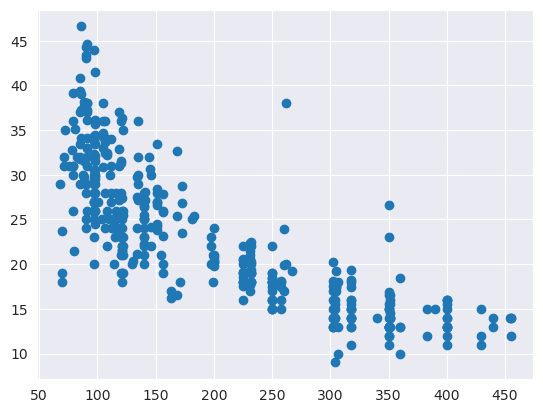

In [14]:
# Verkenning van de correlaties

print(df.corr()['mpg'])

plt.subplots(dpi=100)
plt.scatter(df.displacement, df.mpg)
plt.show()

1. Kies het juiste modeltype

2. Kies de hyperparameters

3. Organiseer de data: _features_ (eigenschappen) en _target_ (resultaat)

4. Creëer een training- en validatieset

5. Start het leerproces

6. Valideer het model

Bereken de determinatiecoëfficient $r^2$.

Bereken de *root mean squared error*, gebruik makend van `mean_squared_error()`.

Wat is de betekenis van dit getal?

Wat gebeurt er met de lineaire regressie als je andere _features_ kiest? Welke deelverzameling van kenmerken is het beste?
